# 1- Importing the Dependencies

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from imblearn.over_sampling import SMOTE

# 2- Read & preprocessing on Training data

In [71]:
df_train = pd.read_csv('fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [72]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [73]:
df_train.drop(columns=['Unnamed: 0','first', 'last', 'city'],index=1,inplace=True)
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [74]:
df_train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [75]:
df_train.duplicated().sum()

0

# 3- Read & preprocessing on Testing data

In [76]:
df_test = pd.read_csv('fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [77]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [78]:
df_test.drop(columns=['Unnamed: 0','first', 'last', 'city'] , axis=1 , inplace=True)

df_test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [79]:
df_test.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [80]:
df_test.duplicated().sum()

0

##  Get information about (train & test) data

In [81]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06,1.296674e+06
mean,4.171924e+17,7.035101e+01,4.880063e+04,3.853761e+01,-9.022631e+01,8.882451e+04,1.349244e+09,3.853733e+01,-9.022644e+01,5.788656e-03
std,1.308807e+18,1.603161e+02,2.689320e+04,5.075802e+00,1.375906e+01,3.019565e+05,1.284127e+07,5.109782e+00,1.377107e+01,7.586272e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689722e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023679e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [82]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01
is_fraud,555719.0,3.859864e-03,6.200784e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296674 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296674 non-null  object 
 1   cc_num                 1296674 non-null  int64  
 2   merchant               1296674 non-null  object 
 3   category               1296674 non-null  object 
 4   amt                    1296674 non-null  float64
 5   gender                 1296674 non-null  object 
 6   street                 1296674 non-null  object 
 7   state                  1296674 non-null  object 
 8   zip                    1296674 non-null  int64  
 9   lat                    1296674 non-null  float64
 10  long                   1296674 non-null  float64
 11  city_pop               1296674 non-null  int64  
 12  job                    1296674 non-null  object 
 13  dob                    1296674 non-null  object 
 14  trans_num              

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   gender                 555719 non-null  object 
 6   street                 555719 non-null  object 
 7   state                  555719 non-null  object 
 8   zip                    555719 non-null  int64  
 9   lat                    555719 non-null  float64
 10  long                   555719 non-null  float64
 11  city_pop               555719 non-null  int64  
 12  job                    555719 non-null  object 
 13  dob                    555719 non-null  object 
 14  trans_num              555719 non-nu

# 4- Encoding for preprocessing


In [89]:
encoder=LabelEncoder()

In [90]:

df_train['trans_date_trans_time']=encoder.fit_transform(df_train['trans_date_trans_time'])
df_train['merchant']=encoder.fit_transform(df_train['merchant'])
df_train['category']=encoder.fit_transform(df_train['category'])
df_train['gender']=encoder.fit_transform(df_train['gender'])
df_train['street']=encoder.fit_transform(df_train['street'])
df_train['state']=encoder.fit_transform(df_train['state'])
df_train['job']=encoder.fit_transform(df_train['job'])
df_train['dob']=encoder.fit_transform(df_train['dob'])
df_train['trans_num']=encoder.fit_transform(df_train['trans_num'])

In [91]:
df_test['trans_date_trans_time']=encoder.fit_transform(df_test['trans_date_trans_time'])
df_test['merchant']=encoder.fit_transform(df_test['merchant'])
df_test['category']=encoder.fit_transform(df_test['category'])
df_test['gender']=encoder.fit_transform(df_test['gender'])
df_test['street']=encoder.fit_transform(df_test['street'])
df_test['state']=encoder.fit_transform(df_test['state'])
df_test['job']=encoder.fit_transform(df_test['job'])
df_test['dob']=encoder.fit_transform(df_test['dob'])
df_test['trans_num']=encoder.fit_transform(df_test['trans_num'])

In [104]:
df_train.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,0,568,27,28654,36.0788,-81.1781,3495,370,779,56438,1325376018,36.011293,-82.048315,0
2,1,38859492057661,390,0,220.11,1,602,13,83252,42.1808,-112.2620,4154,307,302,818702,1325376051,43.150704,-112.154481,0
3,2,3534093764340240,360,2,45.00,1,930,26,59632,46.2306,-112.1138,1939,328,397,544574,1325376076,47.034331,-112.561071,0


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296674 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296674 non-null  int64  
 1   cc_num                 1296674 non-null  int64  
 2   merchant               1296674 non-null  int64  
 3   category               1296674 non-null  int64  
 4   amt                    1296674 non-null  float64
 5   gender                 1296674 non-null  int64  
 6   street                 1296674 non-null  int64  
 7   state                  1296674 non-null  int64  
 8   zip                    1296674 non-null  int64  
 9   lat                    1296674 non-null  float64
 10  long                   1296674 non-null  float64
 11  city_pop               1296674 non-null  int64  
 12  job                    1296674 non-null  int64  
 13  dob                    1296674 non-null  int64  
 14  trans_num              

In [106]:
df_test.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,319,10,2.86,1,341,39,29209,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,591,10,29.84,0,354,43,84002,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,611,5,41.28,0,865,33,11710,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0


In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  int64  
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  int64  
 3   category               555719 non-null  int64  
 4   amt                    555719 non-null  float64
 5   gender                 555719 non-null  int64  
 6   street                 555719 non-null  int64  
 7   state                  555719 non-null  int64  
 8   zip                    555719 non-null  int64  
 9   lat                    555719 non-null  float64
 10  long                   555719 non-null  float64
 11  city_pop               555719 non-null  int64  
 12  job                    555719 non-null  int64  
 13  dob                    555719 non-null  int64  
 14  trans_num              555719 non-nu

# 5- EDA : Explorator Data Analysis
     Visualizing Target Variable.

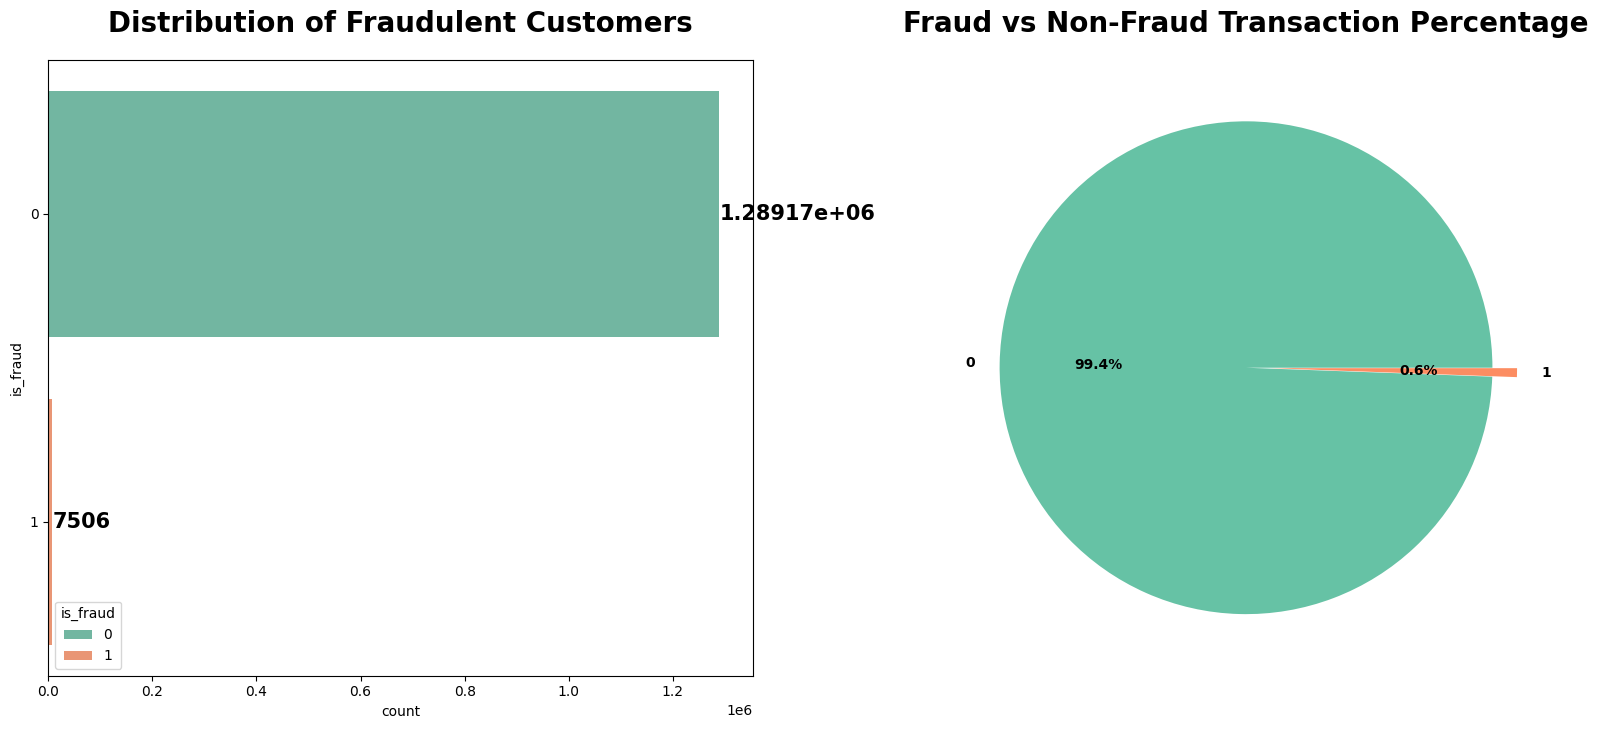

In [146]:
count = df_train["is_fraud"].value_counts()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax=sns.countplot(y ="is_fraud" ,data = df_train , hue="is_fraud",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
ax.bar_label(ax.containers[1],fontweight="black",size=15)
plt.title("Distribution of Fraudulent Customers",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Fraud vs Non-Fraud Transaction Percentage",fontweight="black",size=20,pad=20)
plt.show()

In [130]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289168
1       7506
Name: count, dtype: int64

# 6- Data Splitting

In [109]:
x_train = df_train.drop(columns='is_fraud')
y_train = df_train['is_fraud']
x_test = df_test.drop(columns='is_fraud')
y_test = df_test['is_fraud']

In [110]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (1296674, 18)
Shape of x_test is:  (555719, 18)
Shape of y_train is: (1296674,)
Shape of y_test is:  (555719,)


# 7- Training model

### -----------------------

## 1- with Logistic Regression

In [135]:
model_log = LogisticRegression(max_iter=1000,random_state=42)

model_log.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [136]:
pred_train_log = model_log.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, pred_train_log)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.994211343791886


In [159]:
pred_test_log = model_log.predict(x_test)

accuracy_on_test_data_log = accuracy_score(y_test, pred_test_log)

## 2- with Decision Tree

In [151]:
model_tree = DecisionTreeClassifier(random_state=42)

model_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [152]:
pred_train_RF = model_log.predict(x_train)
accuracy_on_training_data_tree = accuracy_score(y_train, pred_train_RF)

print('Accuracy on training data : ', accuracy_on_training_data_tree)

Accuracy on training data :  0.994211343791886


In [164]:
pred_test_tree = model_log.predict(x_test)

accuracy_on_test_data_tree = accuracy_score(y_test, pred_test_tree)


## 3- with Random Forest

In [154]:
model_RF = RandomForestClassifier(random_state=42)

model_RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [155]:
pred_train_RF = model_log.predict(x_train)
accuracy_on_training_data_rf = accuracy_score(y_train, pred_train_RF)

print('Accuracy on training data : ', accuracy_on_training_data_rf)

Accuracy on training data :  0.994211343791886


In [163]:
pred_test_RF = model_log.predict(x_test)

accuracy_on_test_data_RF = accuracy_score(y_test, pred_test_RF)

# 8- Evaluating the all models

In [162]:
All_Test_Accuracy = [(accuracy_on_test_data_log, accuracy_on_test_data_tree, accuracy_on_test_data_RF)]

rf_score = pd.DataFrame(data = All_Test_Accuracy, columns=['Logistic Regression','Decision Tree','Random Forest'])
rf_score.insert(0, 'Accuracy Score', 'output')
rf_score

,Accuracy Score,Logistic Regression,Decision Tree,Random Forest
0,output,0.99614,0.99614,0.99614


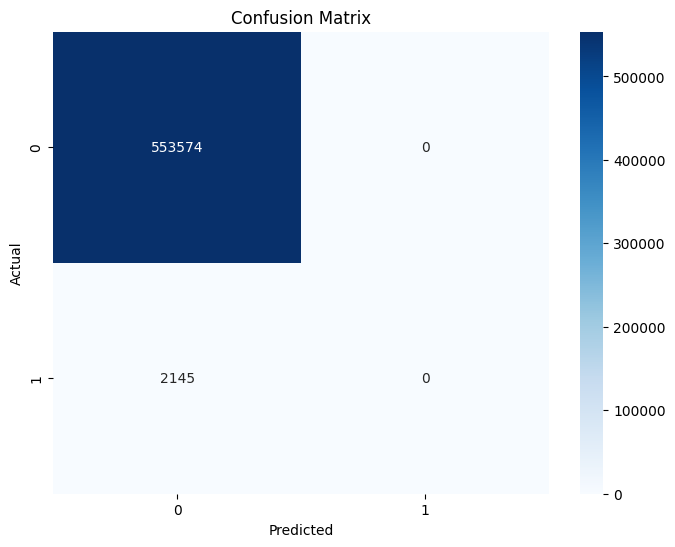

In [169]:
cm = confusion_matrix(y_test, pred_test_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()